In [1]:
import os
os.chdir('D:/source/repos')
os.getcwd()

'D:\\source\\repos'

In [2]:
import numpy as np
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sb; sb.set()
import trading.Funds
from trading.Funds.FundReader import FundReader
from trading.Funds.DBMgr import DBMgr
from trading.Funds.Monitor import *
from trading.Funds.VisualFunds import VisualFunds

### Update database

In [3]:
Initialize()
print( dt.datetime.now().strftime('%Y-%m-%d'))
UpdateAssetsPerformance()

Initialized
2020-10-28

Updating Fund Values...

LU0335216932 93.75 93.75
LU0836513001 249.7 212.81
LU0171310443 55.96 55.96
LU0122379950 55.38 47.2
LU0097036916 32.61 27.79
LU1684797787 324.78 276.8
LU0329931090 6.79 5.79
LU0505655562 7.65 6.52
LU0260869739 21.7 21.7
LU0243957742 20.78 20.78
IE00B29M2H10 2.82 2.82
LU0072913022 636.07 542.1
LU1548497772 212.28 212.28
LU0260870158 29.77 29.77
LU0094560744 35.05 35.05
LU0366534344 237.97 237.97
IE00B530N462 19.77 19.77
LU0049842262 2747.62 2341.7
LU0087412390 131.88 131.88
LU1731833304 10.11 10.11
LU1700711077 145.39 145.39
LU0011963328 47.85 28.79
LU1594335520 109.61 109.61
LU0050372472 31.31 31.31
LU0607516092 18.8 18.8
ES0155844030 36.31 36.31
LU0503631714 256.91 256.91
LU0267388220 26.41 26.41
LU0386882277 288.29 288.29
LU0026741651 787.96 736.98
No data for  LU0306632414
IE00B52VLZ70 7.17 7.17
LU0119209004 2533.63 2159.32
IE00B03HCZ61 27.09 27.09
ES0157638000 8.83 8.83
LU0996182563 187.91 187.91
IE0002639668 38.41 32.74

Updating St

### Performance

#### Funds

In [4]:
dff = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 1 GROUP BY date ORDER BY date DESC'); dff.head(10)

,date,purchase,current,diff
0,2020-10-28,96546,115689,19143
0,2020-10-27,96546,115764,19218
0,2020-10-23,96546,116717,20171
0,2020-10-22,96546,116726,20180
0,2020-10-21,96546,116997,20451
0,2020-10-20,96546,117534,20988
0,2020-10-19,96546,118455,21909
0,2020-10-16,96546,118420,21874
0,2020-10-15,96546,119230,22684
0,2020-10-14,96546,119486,22940


#### Stocks

In [5]:
dfs = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 2 GROUP BY date ORDER BY date DESC'); dfs.head(10)

,date,purchase,current,diff
0,2020-10-28,48209,59889,11680
0,2020-10-27,48209,61546,13337
0,2020-10-23,48209,62936,14727
0,2020-10-22,48209,63822,15613
0,2020-10-21,48209,63963,15754
0,2020-10-20,48209,63055,14846
0,2020-10-19,48209,64628,16419
0,2020-10-16,48209,64330,16121
0,2020-10-15,48209,63695,15486
0,2020-10-14,48209,64619,16410


#### Options

In [6]:
dfo = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 3 GROUP BY date ORDER BY date DESC'); dfo.head(10)

,date,purchase,current,diff
0,2020-10-28,1750,895,-855
0,2020-10-27,1750,996,-754
0,2020-10-23,1750,1082,-668
0,2020-10-22,1750,996,-754
0,2020-10-21,1750,992,-758
0,2020-10-20,1750,971,-779
0,2020-10-19,1750,1015,-735
0,2020-10-16,1750,988,-762
0,2020-10-15,1750,1006,-744
0,2020-10-14,1750,1082,-668


#### All

In [7]:
df = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 0 GROUP BY date ORDER BY date DESC'); df.head(10)

,date,purchase,current,diff
0,2020-10-28,146505,176473,29968
0,2020-10-27,146505,178306,31801
0,2020-10-23,146505,180735,34230
0,2020-10-22,146505,181544,35039
0,2020-10-21,146505,181952,35447
0,2020-10-20,146505,181560,35055
0,2020-10-19,146505,184098,37593
0,2020-10-16,146505,183738,37233
0,2020-10-15,146505,183931,37426
0,2020-10-14,146505,185187,38682


Text(0.5, 1.0, 'ALL')

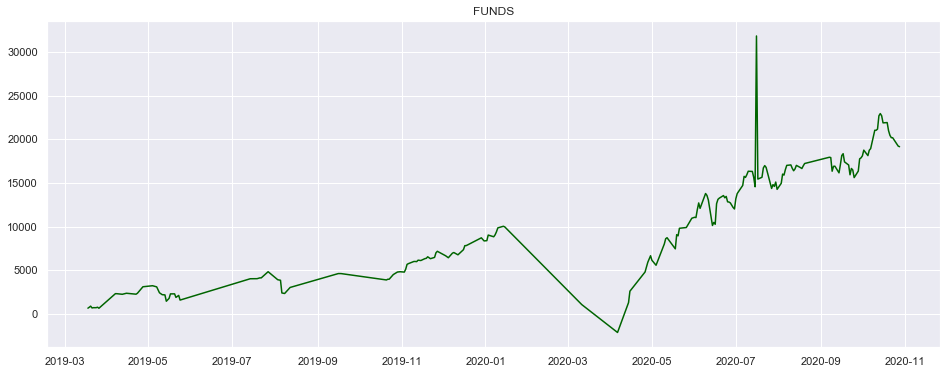

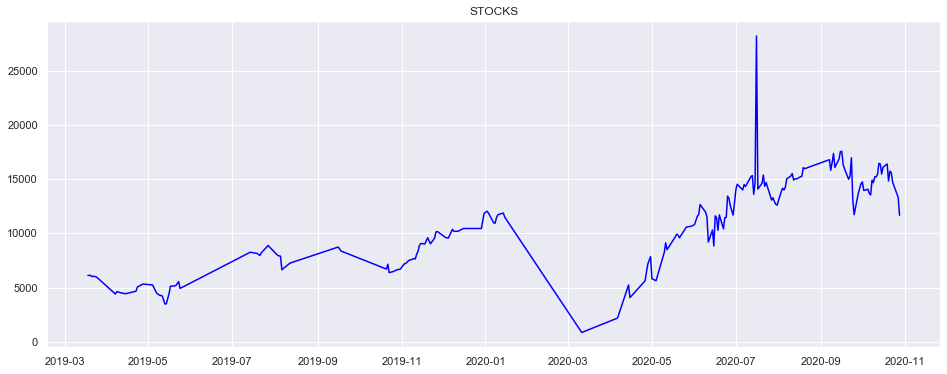

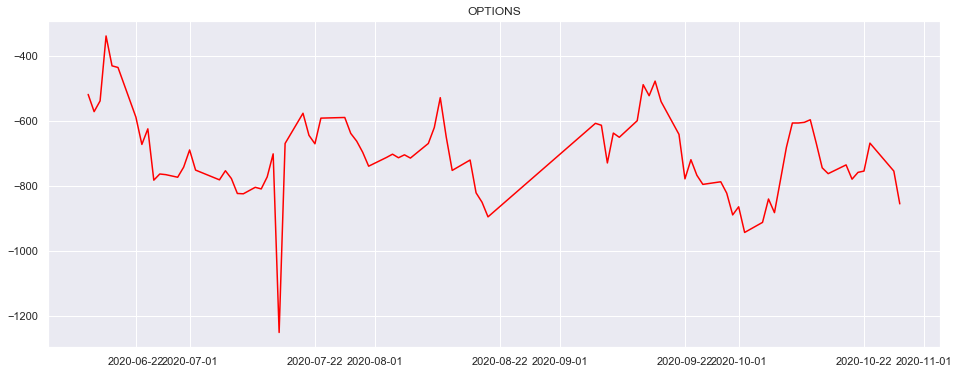

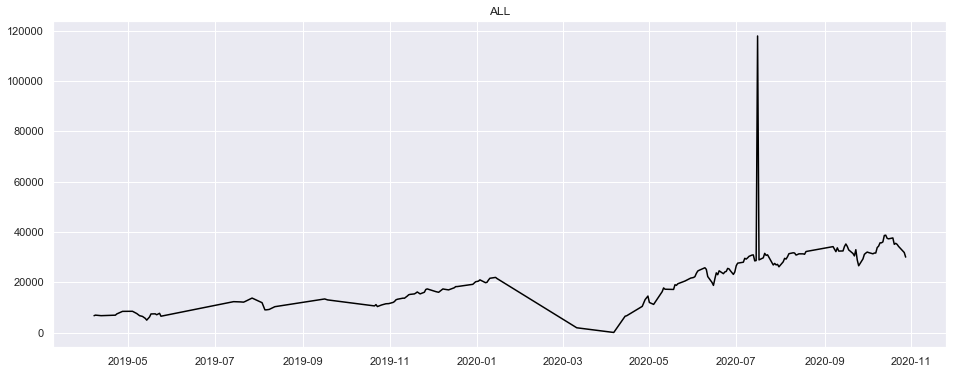

In [8]:
plt.figure(figsize=(16, 6))
dff['diff'].index = dff['date']
sb.lineplot(data=dff['diff'].astype(np.float), color="darkgreen").set_title('FUNDS')

plt.figure(figsize=(16, 6))
dfs['diff'].index = dfs['date']
sb.lineplot(data=dfs['diff'].astype(np.float), color="blue").set_title('STOCKS')

plt.figure(figsize=(16, 6))
dfo['diff'].index = dfo['date']
sb.lineplot(data=dfo['diff'].astype(np.float), color="red").set_title('OPTIONS')

plt.figure(figsize=(16, 6))
df['diff'].index = df['date']
sb.lineplot(data=df['diff'].astype(np.float), color="black").set_title('ALL')

[]

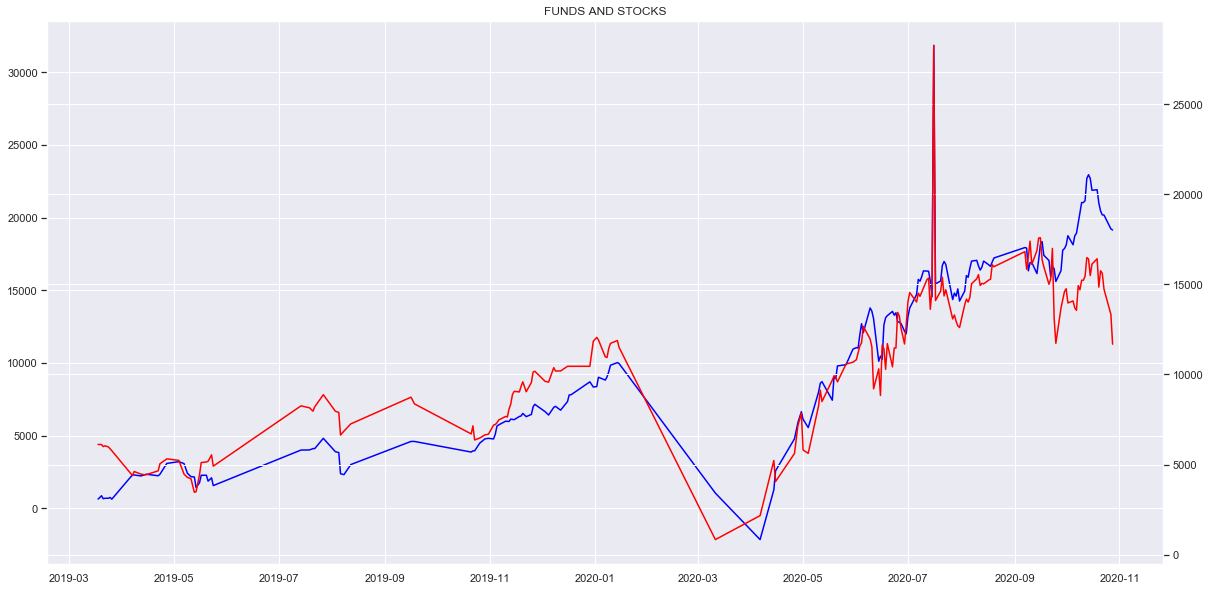

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(data=dff['diff'].astype(np.float), color="blue")
ax2 = ax.twinx()
sb.lineplot(data=dfs['diff'].astype(np.float), color="red").set_title('FUNDS AND STOCKS')
plt.plot(figsize=(16, 6))